# Machine Learning with Arduino

## Import Statements

In [320]:
import numpy as np  # Arrays, matrices and functions on them. Required by Pandas, below
import pandas as pd # A data analysis library
from sklearn.model_selection import train_test_split # scikit-learn, machine learning tools
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt # A plotting library
import seaborn as sns # Built on matplotlib, facilitates aesthetically pleasing plots


import time


## Data Processing

In [365]:
def load_data(filename):
    cols = ["Class"]
    for i in range (1,101):
        cols.append("DP " + str(i))
    hits_df = pd.read_csv(filename, header=None, names=cols) # Use Pandas to load the data into a Pandas DataFrame
    print('Loaded from', filename)
    print('The shape of hits_data is', hits_df.shape)
    print('Number of samples of class 0 (hit)', (hits_df['Class'].astype(int) == 0).sum())
    print('Number of samples of class 1 (miss)', (hits_df['Class'].astype(int) == 1).sum())
    print('')
    return hits_df

In [366]:
filename = 'sample_data.csv'
hits_df = load_data(filename) # This is a function that we created earlier in this notebook

Loaded from sample_data.csv
The shape of hits_data is (20, 101)
Number of samples of class 0 (hit) 15
Number of samples of class 1 (miss) 5



## Visualizing Data

In [323]:
# General settings
sns.set_style('whitegrid') # Plots will have a white grid
# Variables that will help us work with the classes
class_names = ['hit', 'miss']
class_colors = ['darkorange', 'steelblue']

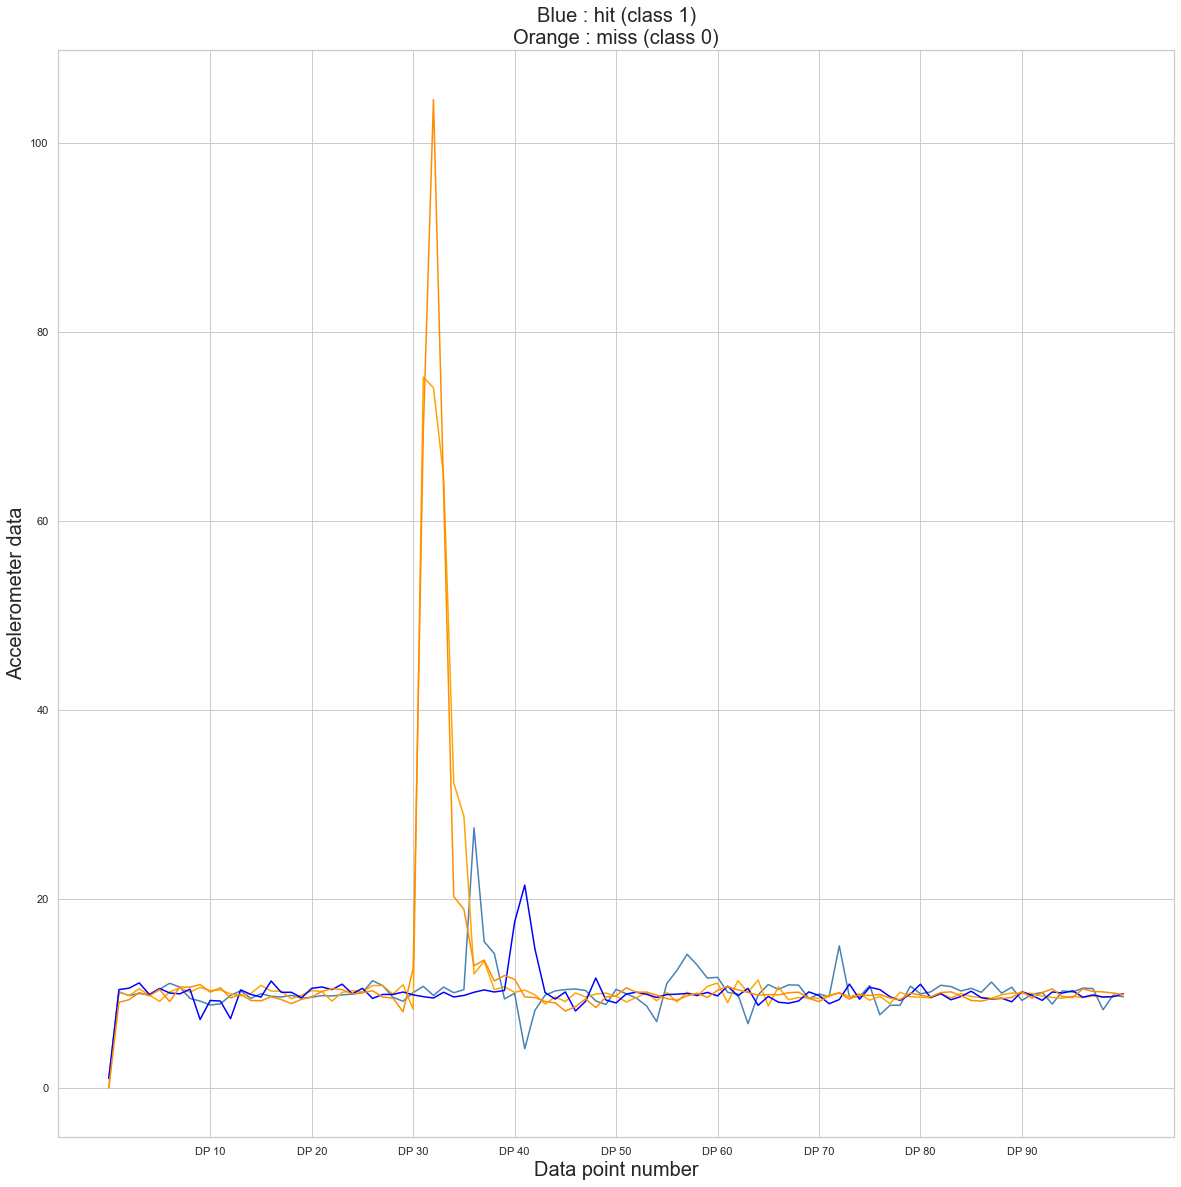

In [324]:
fig, ax = plt.subplots()
plt.title('Blue : hit (class 1)\nOrange : miss (class 0)', size=20)
ax.set_ylabel('Accelerometer data',size=20)
ax.set_xlabel('Data point number',size=20)
ax.set_xticks(range(10,100,10))
sns.set(rc={"figure.figsize":(20, 20)})
df = hits_df.iloc[19]
sns.lineplot(data=df, color = 'steelblue');
df = hits_df.iloc[1]
sns.lineplot(data=df, color = 'orange');
df = hits_df.iloc[16]
sns.lineplot(data=df, color = 'blue');
df = hits_df.iloc[5]
sns.lineplot(data=df, color = 'darkorange');

## Applying a Random Forest Classifier

In [349]:
hits_data = hits_df.drop('Class', axis=1)
hits_label = hits_df['Class']

data_train, data_test, labels_train, labels_test = train_test_split(
    hits_data, hits_label, test_size=.3, stratify=hits_label)

print('The shape of train_data is', data_train.shape)
print('The shape of test_data is', data_test.shape)
print('\nTraining data:')
print('Number of samples of class 0', (labels_train == 0).sum())
print('Number of samples of class 1', (labels_train == 1).sum())
print('\nTest data:')
print('Number of samples of class 0', (labels_test == 0).sum())
print('Number of samples of class 1', (labels_test == 1).sum())

The shape of train_data is (14, 100)
The shape of test_data is (6, 100)

Training data:
Number of samples of class 0 11
Number of samples of class 1 3

Test data:
Number of samples of class 0 4
Number of samples of class 1 2


In [369]:
clf = RandomForestClassifier()
clf.fit(data_train, labels_train)
data_pred = clf.predict(data_test)

(precision, recall, fscore, support) = precision_recall_fscore_support(labels_test, data_pred, average='micro')
print("Performance Metrics of our Random Forest Model:")
print('Precision: {}\tRecall: {}\tfscore:{}'.format(precision, recall, fscore))
  


Performance Metrics of our Random Forest Model:
Precision: 0.6666666666666666	Recall: 0.6666666666666666	fscore:0.6666666666666666
